# Assignment 3

__Instructions:__
- You will use this Keras program to perform binary classification experiments on the Dogs and Cats dataset.
- You can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data (you’ll need to create a Kaggle account if you don’t already have one—don’t worry, the process is painless).
- Adjust the following hyperparameters:
    - Number of hidden layers
    - Number of hidden units
    - Learning rate
    - Mini-batch size
- Use two or more regularization methods.
- Discuss the effect of these hyperparameters and regularization in the performance of classification and in the model overfitting.

__Evaluation ponderation:__
- Hyperparameters tuning and corresponding discussion ---- 50%
- Regularization and corresponding discussion ------------ 50%
- Total ---------------------------------------------------100%

Code reference: https://github.com/fchollet

In [1]:
import keras
keras.__version__

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

'2.3.1'

In [2]:
import os, shutil

In [5]:
# Please correct the urls accordingly

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'D:/Jesus/Algorithm/A3/A3/Data/train'

# The directory where we will
# store our smaller dataset
base_dir = 'D:/Jesus/Algorithm/A3/A3/Data/train1'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Example neural network:

## Network architecture:

1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 512 fully connected neurons, activated by rectified linear unit.
5. Output layer: 1 Sigmoid activated neuron.

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               34560512  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 35,086,337
Trainable params: 35,086,337
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Example model training:

## Characteristics:

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 76s 765ms/step - loss: 0.4992 - acc: 0.7505 - val_loss: 0.5097 - val_acc: 0.6270
Epoch 2/30
100/100 [==============================] - 75s 754ms/step - loss: 0.4841 - acc: 0.7530 - val_loss: 0.8026 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 75s 755ms/step - loss: 0.4673 - acc: 0.7780 - val_loss: 0.7145 - val_acc: 0.6250
Epoch 4/30
100/100 [==============================] - 75s 752ms/step - loss: 0.4513 - acc: 0.7880 - val_loss: 0.7919 - val_acc: 0.5750
Epoch 5/30
100/100 [==============================] - 75s 749ms/step - loss: 0.4630 - acc: 0.7860 - val_loss: 0.6660 - val_acc: 0.6000
Epoch 6/30
100/100 [==============================] - 76s 756ms/step - loss: 0.4396 - acc: 0.7905 - val_loss: 0.7922 - val_acc: 0.5770
Epoch 7/30
100/100 [==============================] - 75s 745ms/step - loss: 0.4430 - acc: 0.7970 - val_loss: 0.8344 - val_acc: 0.5920
Epoch 8/30
100/100 [==============================] - 7

# Example model training:

## Results:

The training accuracy went up too much without improving the validation accuracy, which implies that the system got overfitted.

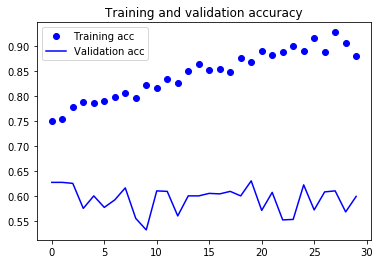

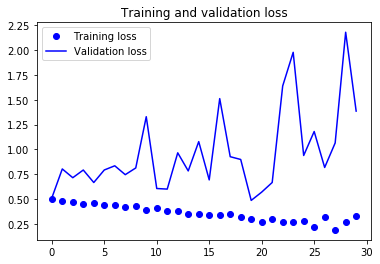

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# First self made neural network:

## Network architecture:

We added a furth layer to the previous one.

1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 512 fully connected neurons, activated by rectified linear unit.
5. Fourth layer: 512 fully connected neurons, activated by rectified linear unit.
6. Output layer: 1 Sigmoid activated neuron.

In [15]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               34560512  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [17]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

# First model training:

## Characteristics:

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. LEarning rate: 0.01

In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 82s 818ms/step - loss: 0.6986 - acc: 0.4985 - val_loss: 0.6759 - val_acc: 0.5400
Epoch 2/30
100/100 [==============================] - 79s 788ms/step - loss: 0.6851 - acc: 0.5470 - val_loss: 0.6539 - val_acc: 0.5360
Epoch 3/30
100/100 [==============================] - 79s 792ms/step - loss: 0.6793 - acc: 0.5705 - val_loss: 0.6636 - val_acc: 0.5510
Epoch 4/30
100/100 [==============================] - 78s 781ms/step - loss: 0.6775 - acc: 0.5755 - val_loss: 0.7107 - val_acc: 0.5640
Epoch 5/30
100/100 [==============================] - 77s 772ms/step - loss: 0.6673 - acc: 0.5790 - val_loss: 0.7608 - val_acc: 0.5660
Epoch 6/30
100/100 [==============================] - 78s 780ms/step - loss: 0.6600 - acc: 0.6105 - val_loss: 0.6908 - val_acc: 0.5900
Epoch 7/30
100/100 [==============================] - 79s 791ms/step - loss: 0.6519 - acc: 0.6135 - val_loss: 0.7862 - val_acc: 0.5880
Epoch 8/30
100/100 [==============================] - 7

# First model training:

## Results:

While this model included additional layers for the NN it was easily observable that the only difference with the previous model was a reduction in the accuracy obtained on the training level. This however didn't affected the accuracy obtained with the validation data-set. This two factors imply that while the model was not as efficient as before to achieve overtraining, it still continued lacking the capabilities of generalization required to adequately classify the validation set.

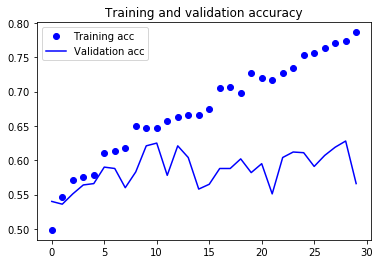

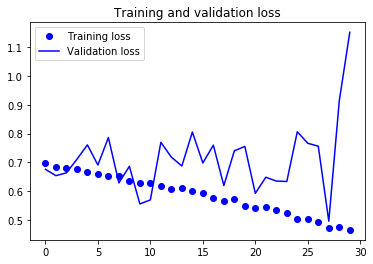

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Second neural network:

## Network architecture:

This network has only two hidden layers.

1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
5. Output layer: 1 Sigmoid activated neuron.

In [20]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               34560512  
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 34,823,681
Trainable params: 34,823,681
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

# Example model training:

## Characteristics:

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.01

In [23]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 78s 777ms/step - loss: 0.7245 - acc: 0.5190 - val_loss: 0.7817 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 77s 774ms/step - loss: 0.6959 - acc: 0.5350 - val_loss: 0.7919 - val_acc: 0.5040
Epoch 3/30
100/100 [==============================] - 76s 765ms/step - loss: 0.6914 - acc: 0.5485 - val_loss: 0.7021 - val_acc: 0.5670
Epoch 4/30
100/100 [==============================] - 74s 745ms/step - loss: 0.6742 - acc: 0.5785 - val_loss: 0.8774 - val_acc: 0.5080
Epoch 5/30
100/100 [==============================] - 77s 771ms/step - loss: 0.6727 - acc: 0.5850 - val_loss: 0.7171 - val_acc: 0.5900
Epoch 6/30
100/100 [==============================] - 77s 769ms/step - loss: 0.6717 - acc: 0.5940 - val_loss: 0.6223 - val_acc: 0.5850
Epoch 7/30
100/100 [==============================] - 77s 770ms/step - loss: 0.6474 - acc: 0.6135 - val_loss: 0.7782 - val_acc: 0.5600
Epoch 8/30
100/100 [==============================] - 7

# Second model training:

## Results:

Here again the results show a considerable decrease on the accuracy during the training phase and relatively no impovement during validation. This again confirms with high probability that the model overfitted, however again not as much as the original 4-layer model.

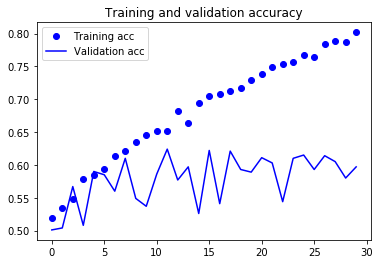

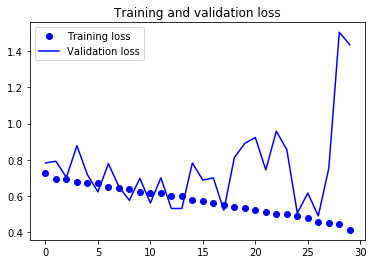

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Third neural network:

## Network architecture:

For this architecture, we decreased the number of units in the first and third layer by half

1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 256 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 256 fully connected neurons, activated by rectified linear unit.
5. Output layer: 1 Sigmoid activated neuron.

In [25]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               17280256  
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 17,543,425
Trainable params: 17,543,425
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

# Third model training:

## Characteristics:

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.01

In [28]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 44s 442ms/step - loss: 0.7169 - acc: 0.5240 - val_loss: 0.7255 - val_acc: 0.5050
Epoch 2/30
100/100 [==============================] - 44s 441ms/step - loss: 0.6929 - acc: 0.5205 - val_loss: 0.6936 - val_acc: 0.5680
Epoch 3/30
100/100 [==============================] - 44s 442ms/step - loss: 0.6836 - acc: 0.5645 - val_loss: 0.7156 - val_acc: 0.5710
Epoch 4/30
100/100 [==============================] - 42s 424ms/step - loss: 0.6837 - acc: 0.5635 - val_loss: 0.6511 - val_acc: 0.5620
Epoch 5/30
100/100 [==============================] - 46s 459ms/step - loss: 0.6768 - acc: 0.5660 - val_loss: 0.6625 - val_acc: 0.5750
Epoch 6/30
100/100 [==============================] - 46s 458ms/step - loss: 0.6703 - acc: 0.5860 - val_loss: 0.6155 - val_acc: 0.5490
Epoch 7/30
100/100 [==============================] - 46s 463ms/step - loss: 0.6533 - acc: 0.6110 - val_loss: 0.5881 - val_acc: 0.6050
Epoch 8/30
100/100 [==============================] - 4

# Third model training:

## Results:

Validation accuracy improved if any the slightest as it seems to have acquired an upwards trend, yet again the model seems to have overfitted with the training set but with a poorer performance than that of all the previous models.

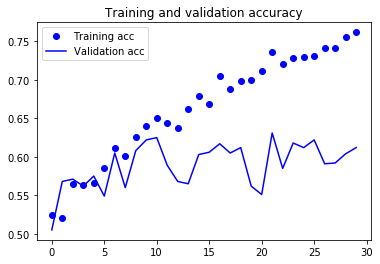

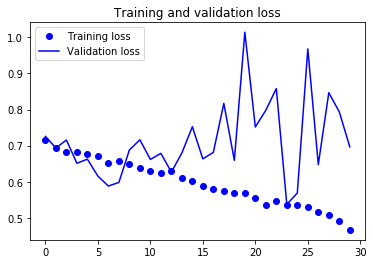

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fourth neural network:

## Network architecture:

The network has five hidden layers, but the number of neurons is reduced from 512 to 256

1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 256 fully connected neurons, activated by rectified linear unit.
3. Second layer: 256 fully connected neurons, activated by rectified linear unit.
4. Third layer: 256 fully connected neurons, activated by rectified linear unit.
5. Fourth layer: 256 fully connected neurons, activated by rectified linear unit.
6. Fifth layer :256 fully connected neurons, activated by rectified linear unit.
7. Output layer: 1 Sigmoid activated neuron.

In [30]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               17280256  
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [32]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

# Fourth model training:

## Characteristics:

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.01

In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 47s 466ms/step - loss: 0.6960 - acc: 0.5220 - val_loss: 0.6661 - val_acc: 0.5360
Epoch 2/30
100/100 [==============================] - 46s 461ms/step - loss: 0.6872 - acc: 0.5545 - val_loss: 0.6958 - val_acc: 0.5160
Epoch 3/30
100/100 [==============================] - 47s 467ms/step - loss: 0.6819 - acc: 0.5610 - val_loss: 0.6736 - val_acc: 0.5570
Epoch 4/30
100/100 [==============================] - 46s 461ms/step - loss: 0.6723 - acc: 0.5800 - val_loss: 0.7100 - val_acc: 0.5670
Epoch 5/30
100/100 [==============================] - 46s 463ms/step - loss: 0.6621 - acc: 0.6070 - val_loss: 0.7242 - val_acc: 0.5540
Epoch 6/30
100/100 [==============================] - 47s 466ms/step - loss: 0.6605 - acc: 0.6100 - val_loss: 0.6985 - val_acc: 0.5810
Epoch 7/30
100/100 [==============================] - 46s 459ms/step - loss: 0.6562 - acc: 0.6150 - val_loss: 0.5765 - val_acc: 0.5650
Epoch 8/30
100/100 [==============================] - 4

# Fourth model training:

## Results:

The training accuracy of this particular model increased too much without improving the validation accuracy, again this model got overfitted. And not surprisingly the validation accuracy seemed to have lost any coherence or any possible increment showing almost random behaviour.

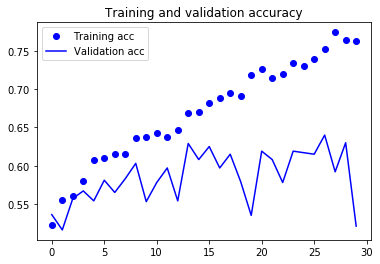

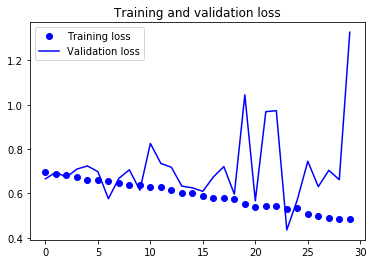

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Fifth neural network:

## Network architecture:


1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 512 fully connected neurons, activated by rectified linear unit.
5. Fourth layer: 512 fully connected neurons, activated by rectified linear unit.
7. Output layer: 1 Sigmoid activated neuron.

In [35]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               34560512  
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 513       
Total params: 35,348,993
Trainable params: 35,348,993
Non-trainable params: 0
__________________________________________

In [37]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

# Fifth model training:

## Characteristics:

Here, we begin changing the learning rate from 0.01 to 0.0001

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.0001

In [38]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 82s 823ms/step - loss: 0.6966 - acc: 0.5030 - val_loss: 0.7060 - val_acc: 0.5160
Epoch 2/30
100/100 [==============================] - 82s 817ms/step - loss: 0.6924 - acc: 0.5295 - val_loss: 0.6851 - val_acc: 0.5240
Epoch 3/30
100/100 [==============================] - 82s 818ms/step - loss: 0.6891 - acc: 0.5590 - val_loss: 0.6654 - val_acc: 0.5380
Epoch 4/30
100/100 [==============================] - 80s 799ms/step - loss: 0.6864 - acc: 0.5570 - val_loss: 0.6980 - val_acc: 0.5450
Epoch 5/30
100/100 [==============================] - 81s 814ms/step - loss: 0.6838 - acc: 0.5690 - val_loss: 0.6784 - val_acc: 0.5520
Epoch 6/30
100/100 [==============================] - 82s 817ms/step - loss: 0.6821 - acc: 0.5790 - val_loss: 0.6800 - val_acc: 0.5580
Epoch 7/30
100/100 [==============================] - 81s 810ms/step - loss: 0.6796 - acc: 0.5855 - val_loss: 0.6951 - val_acc: 0.5630
Epoch 8/30
100/100 [==============================] - 8

# Fifth model training:

## Results:

The training accuracy escalated rather quickly unlike the validation accuracy, this behaviour implies that the system got overfitted. The validation accuracy grew smoother than in previous cases, thanks to the significantly smaller steps that the gradient descent took while modifing the paremeters of the model because of the diminishing of the learning rate. The tradeoff for this smoothness is that the trining time almost doubles, obtauning practically the same results than previous models.

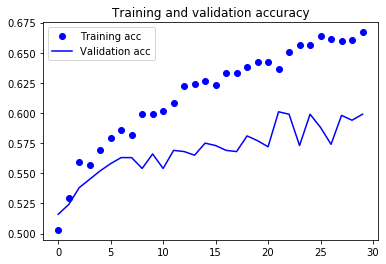

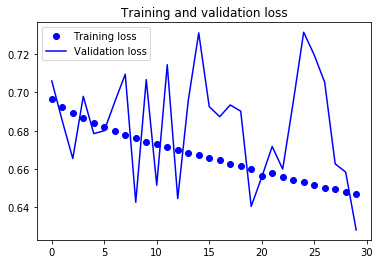

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Sixth neural network:

## Network architecture:


1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 512 fully connected neurons, activated by rectified linear unit.
5. Fourth layer: 512 fully connected neurons, activated by rectified linear unit.
7. Output layer: 1 Sigmoid activated neuron.

In [40]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               34560512  
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 513       
Total params: 35,348,993
Trainable params: 35,348,993
Non-trainable params: 0
__________________________________________

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.5, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

# Sixth model training:

## Characteristics:

In this case, we set the learning rate in the other direction, and make it 50 times larger

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.5

In [43]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 83s 828ms/step - loss: nan - acc: 0.0265 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/30
100/100 [==============================] - 82s 823ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/30
100/100 [==============================] - 82s 818ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/30
100/100 [==============================] - 82s 822ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/30
100/100 [==============================] - 83s 826ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/30
100/100 [==============================] - 82s 822ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/30
100/100 [==============================] - 82s 823ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/30
100/100 [=========================

# Sixth model training:

## Results:

In this case the algorithm did not learn at all. We think that such a big learning rate made the parameters get so high that the registers containing them got overflown.

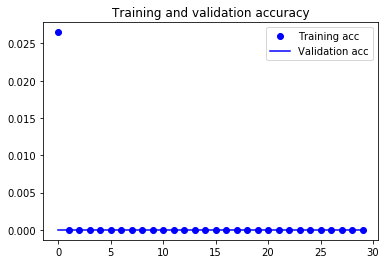

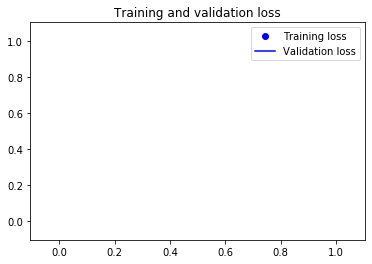

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Seventh neural network:

## Network architecture:


1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 512 fully connected neurons, activated by rectified linear unit.
7. Output layer: 1 Sigmoid activated neuron.

In [45]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Seventh model training:

For this model, we returned to the learning rate of 0.01, but we halved the batch size

## Characteristics:

1. Batch in training: 10
2. Batch in validation: 10
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.01

In [47]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


In [48]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               34560512  
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 513       
Total params: 35,086,337
Trainable params: 35,086,337
Non-trainable params: 0
_________________________________________________________________


In [49]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

In [50]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 78s 780ms/step - loss: 0.7282 - acc: 0.5100 - val_loss: 0.6612 - val_acc: 0.4880
Epoch 2/30
100/100 [==============================] - 78s 777ms/step - loss: 0.7035 - acc: 0.5050 - val_loss: 0.7063 - val_acc: 0.5260
Epoch 3/30
100/100 [==============================] - 77s 774ms/step - loss: 0.6979 - acc: 0.5130 - val_loss: 0.6813 - val_acc: 0.4720
Epoch 4/30
100/100 [==============================] - 77s 770ms/step - loss: 0.6931 - acc: 0.5380 - val_loss: 0.6978 - val_acc: 0.4720
Epoch 5/30
100/100 [==============================] - 78s 776ms/step - loss: 0.6846 - acc: 0.5500 - val_loss: 0.7270 - val_acc: 0.5460
Epoch 6/30
100/100 [==============================] - 77s 774ms/step - loss: 0.6896 - acc: 0.5320 - val_loss: 0.7058 - val_acc: 0.5160
Epoch 7/30
100/100 [==============================] - 77s 771ms/step - loss: 0.6810 - acc: 0.5800 - val_loss: 0.6400 - val_acc: 0.5180
Epoch 8/30
100/100 [==============================] - 7

# Seventh model training:

## Results:

Changing the batch size from 20 to 10 units did not had a meaningful effect in the performance of the model, the training accuracy continues to increase at a significantly faster rate than that of the validation model meaning only that once again the model continues to learn the training set instead of identifying any patterns.

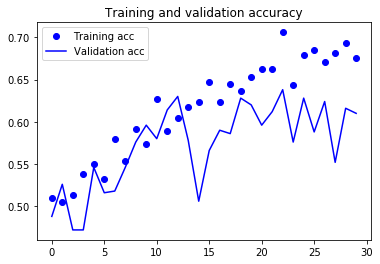

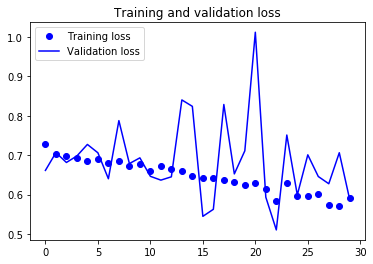

In [51]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Eighth neural network:

## Network architecture:


1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 512 fully connected neurons, activated by rectified linear unit.
7. Output layer: 1 Sigmoid activated neuron.

In [57]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=40,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [58]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (40, 150, 150, 3)
labels batch shape: (40,)


# Eighth model training:

We made the batch size greater instead of diminishing it.

## Characteristics:

1. Batch in training: 40
2. Batch in validation: 40
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.01

In [59]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               34560512  
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 513       
Total params: 35,086,337
Trainable params: 35,086,337
Non-trainable params: 0
_________________________________________________________________


In [60]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

In [61]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 92s 916ms/step - loss: 0.5199 - acc: 0.7297 - val_loss: 0.5909 - val_acc: 0.5960
Epoch 2/30
100/100 [==============================] - 91s 910ms/step - loss: 0.5030 - acc: 0.7480 - val_loss: 0.7160 - val_acc: 0.6200
Epoch 3/30
100/100 [==============================] - 91s 915ms/step - loss: 0.4880 - acc: 0.7563 - val_loss: 0.7351 - val_acc: 0.5860
Epoch 4/30
100/100 [==============================] - 91s 910ms/step - loss: 0.4720 - acc: 0.7697 - val_loss: 0.8265 - val_acc: 0.6320
Epoch 5/30
100/100 [==============================] - 90s 904ms/step - loss: 0.4649 - acc: 0.7745 - val_loss: 0.9382 - val_acc: 0.6080
Epoch 6/30
100/100 [==============================] - 92s 918ms/step - loss: 0.4546 - acc: 0.7822 - val_loss: 0.7962 - val_acc: 0.5900
Epoch 7/30
100/100 [==============================] - 92s 918ms/step - loss: 0.4405 - acc: 0.7960 - val_loss: 0.9122 - val_acc: 0.5980
Epoch 8/30
100/100 [==============================] - 9

# Eighth model training:

## Results:

Increasing the batch size almost to twice the original size did caused the model to have an slightly increase in performance, however we barely reach above 0.6 during validation this hoever unlike other models remained more stable through the process. This means that while a larger batch is useful for providing the model with more examples to generalize with it is not enough to avoid overfitting nor to provide a better generalization for new instances.

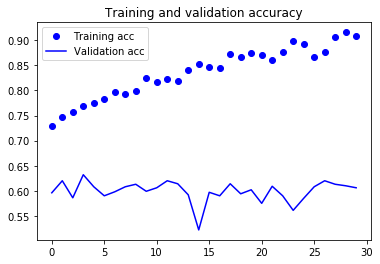

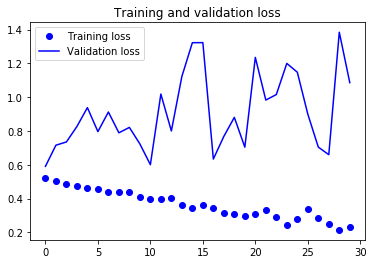

In [62]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Ninth neural network:

For this network, all the hidden layers have implemented a kernel regularized with l2 = 0.0001

## Network architecture:


1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 256 fully connected neurons, activated by rectified linear unit.
3. Second layer: 256 fully connected neurons, activated by rectified linear unit.
4. Third layer: 256 fully connected neurons, activated by rectified linear unit.
5. Fourth layer: 256 fully connected neurons, activated by rectified linear unit.
6. Fifth layer: 256 fully connected neurons, activated by rectified linear unit.
7. Output layer: 1 Sigmoid activated neuron.

In [63]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               17280256  
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_42 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                

In [65]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Ninth model training:

## Characteristics:

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.01
7. Regularization is implemented with l2 = 0.0001

In [66]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

In [67]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 84s 839ms/step - loss: 0.8517 - acc: 0.5200 - val_loss: 0.8521 - val_acc: 0.5500
Epoch 2/30
100/100 [==============================] - 83s 829ms/step - loss: 0.8409 - acc: 0.5575 - val_loss: 0.8735 - val_acc: 0.5300
Epoch 3/30
100/100 [==============================] - 84s 838ms/step - loss: 0.8353 - acc: 0.5635 - val_loss: 0.8817 - val_acc: 0.5440
Epoch 4/30
100/100 [==============================] - 83s 828ms/step - loss: 0.8293 - acc: 0.5790 - val_loss: 0.7401 - val_acc: 0.5900
Epoch 5/30
100/100 [==============================] - 84s 838ms/step - loss: 0.8231 - acc: 0.5960 - val_loss: 0.8378 - val_acc: 0.5830
Epoch 6/30
100/100 [==============================] - 84s 837ms/step - loss: 0.8170 - acc: 0.5980 - val_loss: 0.8187 - val_acc: 0.5540
Epoch 7/30
100/100 [==============================] - 82s 825ms/step - loss: 0.8101 - acc: 0.6005 - val_loss: 0.8323 - val_acc: 0.5690
Epoch 8/30
100/100 [==============================] - 8

# Ninth model training:

## Results:

Intended to be a tool for reducing the complexity of a model the Ridge Regression did caused the network to avoid as much overfitting as it had previously done, however the predictive model obtained was not good enough to classify the validation set. It is worth noting that this time the NN was capable of obtaining acciracies of 0.63 and 0.64 at two of the epochs which shows a better performance yet the improvement over previos attemps is negligible.

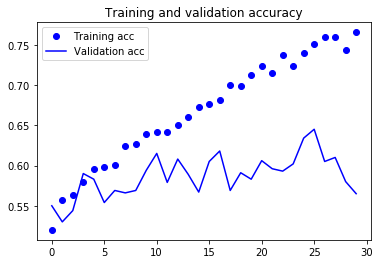

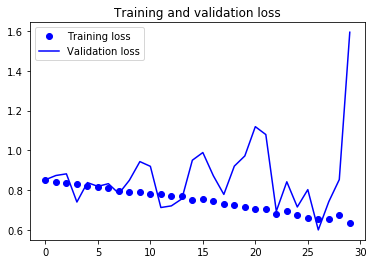

In [68]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Tenth neural network:

This neural network has implemented a regularizer with l2 = 0.0001, and it also implement the dropout method with a probability of 0.25.

## Network architecture:


1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 512 fully connected neurons, activated by rectified linear unit.
5. Fourth layer: 512 fully connected neurons, activated by rectified linear unit.
6. Fifth layer : 512 fully connected neurons, activated by rectified linear unit.
7. Output layer: 1 Sigmoid activated neuron.

In [77]:
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

In [78]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 67500)             0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               34560512  
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)             

In [79]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

# Tenth model training:

## Characteristics:

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.01
7. Regularization with l2 = 0.0001
8. Dropout with probability of 0.25

In [80]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 151s 2s/step - loss: 1.0288 - acc: 0.5110 - val_loss: 1.0097 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 151s 2s/step - loss: 1.0176 - acc: 0.4990 - val_loss: 1.0062 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 151s 2s/step - loss: 1.0073 - acc: 0.5080 - val_loss: 0.9982 - val_acc: 0.5010
Epoch 4/30
100/100 [==============================] - 154s 2s/step - loss: 1.0067 - acc: 0.5010 - val_loss: 0.9984 - val_acc: 0.5030
Epoch 5/30
100/100 [==============================] - 149s 1s/step - loss: 1.0035 - acc: 0.5070 - val_loss: 0.9828 - val_acc: 0.5460
Epoch 6/30
100/100 [==============================] - 150s 2s/step - loss: 0.9982 - acc: 0.5305 - val_loss: 0.9802 - val_acc: 0.5450
Epoch 7/30
100/100 [==============================] - 150s 2s/step - loss: 0.9998 - acc: 0.5280 - val_loss: 1.0239 - val_acc: 0.5080
Epoch 8/30
100/100 [==============================] - 150s 1s/step - 

# Tenth model training:

## Results:

By duplicating the number of hiden units and combining both a Ridge regression and a set of dropout layers, we where able to fight overfitting as both the training and the validation accuracies show similar behaviours and are closer one another.  However as shown in the plots the trend of the training accuracy still increases more than that of the validation. Not to mention the overall poor performance of the model while classifying new instances. Furthermore, we can see that the cost function for the validation set skyrockets just before the algorithm terminates.

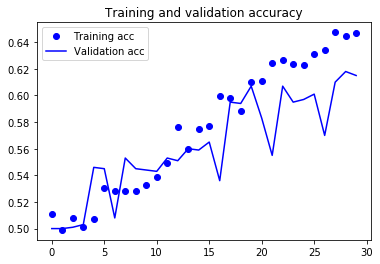

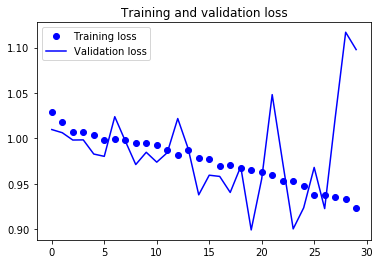

In [81]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Eleventh neural network:

The neural network has implemented a regularizer with l2 = 0.0001 and dropout with probability of 0.25 in every hidden layer

## Network architecture:


1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 512 fully connected neurons, activated by rectified linear unit.
5. Fourth layer: 512 fully connected neurons, activated by rectified linear unit.
6. Fifth layer: 512 fully connected neurons, activated by rectified linear unit.
7. Output layer: 1 Sigmoid activated neuron.

In [82]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

In [83]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 67500)             0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               34560512  
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)             

In [85]:
from keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

# Eleventh model training:

## Characteristics:

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.01
7. Regularization with l2 = 0.0001
8. Dropout with probability of 0.25
9. Early stopping with patience of 2


In [86]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50, callbacks=[EarlyStopping(monitor='val_acc', patience=2)])

Epoch 1/30
100/100 [==============================] - 159s 2s/step - loss: 1.0316 - acc: 0.4995 - val_loss: 1.0167 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 157s 2s/step - loss: 1.0107 - acc: 0.5070 - val_loss: 0.9963 - val_acc: 0.4960
Epoch 3/30
100/100 [==============================] - 158s 2s/step - loss: 1.0090 - acc: 0.4920 - val_loss: 0.9969 - val_acc: 0.5320
Epoch 4/30
100/100 [==============================] - 157s 2s/step - loss: 1.0034 - acc: 0.5180 - val_loss: 0.9970 - val_acc: 0.5340
Epoch 5/30
100/100 [==============================] - 155s 2s/step - loss: 1.0018 - acc: 0.5045 - val_loss: 0.9847 - val_acc: 0.5310
Epoch 6/30
100/100 [==============================] - 156s 2s/step - loss: 1.0007 - acc: 0.5265 - val_loss: 0.9992 - val_acc: 0.5400
Epoch 7/30
100/100 [==============================] - 156s 2s/step - loss: 1.0022 - acc: 0.5200 - val_loss: 0.9942 - val_acc: 0.5480
Epoch 8/30
100/100 [==============================] - 156s 2s/step - 

# Eleventh model training:

## Results:

In this particular case the early stopping only caused the model to stop the training at an early stage. While this significantly reduced the computational cost of the more complex model it also affected negatively to the performance of the network, since only 9 out of the 30 epochs where performed.

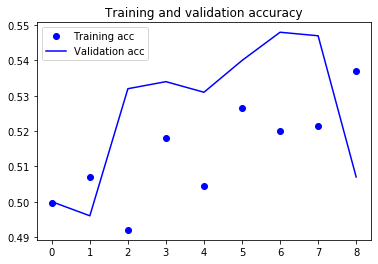

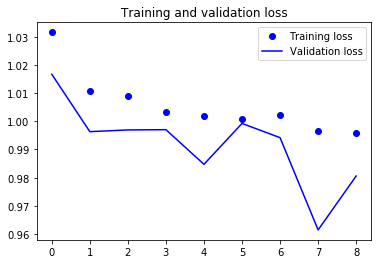

In [87]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Twelfth neural network:

This neural network has implemented a regularizer with l2 = 0.0001 and dropout with probability of 0.25 in every hidden layer

## Network architecture:


1. Input layer: 150 x 150 x 3 neurons 
2. First layer: 512 fully connected neurons, activated by rectified linear unit.
3. Second layer: 512 fully connected neurons, activated by rectified linear unit.
4. Third layer: 512 fully connected neurons, activated by rectified linear unit.
5. Fourth layer: 512 fully connected neurons, activated by rectified linear unit.
6. Fifth layer: 512 fully connected neurons, activated by rectified linear unit.
7. Output layer: 1 Sigmoid activated neuron.

In [88]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

In [89]:
from keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

# Twelfth model training:

## Characteristics:

1. Batch in training: 20
2. Batch in validation: 20
3. Steps per epoch: 100
4. Epochs: 30
5. Validation steps:50
6. Learning rate: 0.01
7. Regularization with l2 = 0.0001
8. Dropout with probability of 0.25
9. Early stopping with a patience of 3 

In [91]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50, callbacks=[EarlyStopping(monitor='val_acc', patience=3)])

Epoch 1/30
100/100 [==============================] - 152s 2s/step - loss: 1.0300 - acc: 0.5045 - val_loss: 1.0051 - val_acc: 0.5120
Epoch 2/30
100/100 [==============================] - 151s 2s/step - loss: 1.0061 - acc: 0.5290 - val_loss: 0.9877 - val_acc: 0.5230
Epoch 3/30
100/100 [==============================] - 153s 2s/step - loss: 1.0103 - acc: 0.5015 - val_loss: 1.0456 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 151s 2s/step - loss: 1.0064 - acc: 0.5055 - val_loss: 1.0040 - val_acc: 0.5080
Epoch 5/30
100/100 [==============================] - 148s 1s/step - loss: 1.0008 - acc: 0.5110 - val_loss: 1.0013 - val_acc: 0.5200


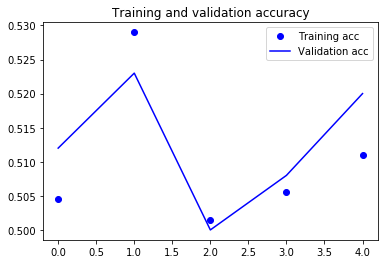

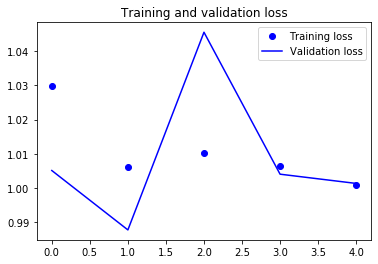

In [92]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Twelfth model training:

## Results:

Somehow this time even when the patience of the earlystopping was increased the model stopped earlier, which only resulted in even poorer results than those obtained by the previous hoever we can see that the accuracy of both the training and validation is quite similar.

# Discussion

This dataset is not easy to solve. In fact, having just over 0.83 accuracy would make you earn bronze in the kaggle competition. By analysing the winners of that same competition, we can guarantee that it is possible to achieve an accuracy of almost 0.99 but for this a lot of preprocessing and more complex techniques would be necessary, together with a lot of time and computational resources. 

It was relatively easy to see some of the effects that the hyperparameters have over the training and performance of a model: more complex models take longer to train but have a larger possibility of achieve a better accuracy. The learning rate has the effect of smoothing the validation and test accuracy and costs over time due to the difference in the step size that the gradient takes while searching for the optimal weights and bias. But some effects were negligible, like adding more hidden layers or halving the number of units per layer. This does not mean that the tools used here are useless, the dataset is just difficult to classify using techniques so basic, definitelly there are more advanced contraptions that might obtain a better performance, however we have to take note on the importance of identifying the adequate model for a particular task.